# Gapminder

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from gapminder import gapminder
from see import see

[Gapminder](https://www.gapminder.org)とは世界規模で見た経済格差をデータで探る有名なサイトであり、一見の価値があるサイトである。そのサイトで使われているデータを整理してパッケージにまとめたのが`gapminder`である。

````{note}
MacではTerminal、WindowsではGit Bashを使い、次のコマンドで`gapminder`をインストールできる。
```
pip install gapminder
```
````

ここでは`gapminder`に含まれるデータを使い`pandas`の`groupby`という`DataFrame`のメソッドの使い方の例を紹介する。両方ともデータをグループ化して扱う場合に非常に重宝するので、覚えておいて損はしないだろう。

## データ

＜列ラベル＞
* `country`：国名
* `continent`：大陸
* `year`：年
* `lifeExp`：平均寿命
* `pop`：人口
* `gdpPercap`：一人当たりGDP（国内総生産）

データの読み込みと最初の5行の表示

In [2]:
df = gapminder
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


最後の5行の表示

In [3]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


データセットの内容確認

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


記述統計の表示

In [5]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


含まれる国名の表示

In [6]:
countries = df.loc[:,'country'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

国の数の確認

In [7]:
len(countries)

142

`2007`年における`continent`の内訳（国の数）

In [8]:
cond = ( df['year']==df['year'].max() )
df.loc[cond,:].value_counts('continent')

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
dtype: int64

割合で表すと

In [9]:
cond = ( df['year']==df['year'].max() )
df.loc[cond,:].value_counts('continent', normalize=True)

continent
Africa      0.366197
Asia        0.232394
Europe      0.211268
Americas    0.176056
Oceania     0.014085
dtype: float64

## groupby()

In [10]:
df_group = df.groupby('continent')

In [11]:
see(df_group)

    .*                 []                 <                  <=
    ==                 !=                 >                  >=
    dir()              hash()             iter()             len()
    repr()             str()              .agg()             .aggregate()
    .all()             .any()             .apply()           .backfill()
    .bfill()           .boxplot()         .continent         .corr()
    .corrwith()        .count()           .country           .cov()
    .cumcount()        .cummax()          .cummin()          .cumprod()
    .cumsum()          .describe()        .diff()            .dtypes
    .ewm()             .expanding()       .ffill()           .fillna()
    .filter()          .first()           .gdpPercap         .get_group()
    .groups            .head()            .hist()            .idxmax()
    .idxmin()          .indices           .last()            .lifeExp
    .mad()             .max()             .mean()            .median()
    .min()             

### continentの内訳（again）

In [12]:
country_names = df_group['country'].nunique()
country_names

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

### 統計量

In [13]:
three_vars=['lifeExp','pop','gdpPercap']

#### 観測値の数

大陸別の観測値の数

In [14]:
df_group.size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

棒グラフ

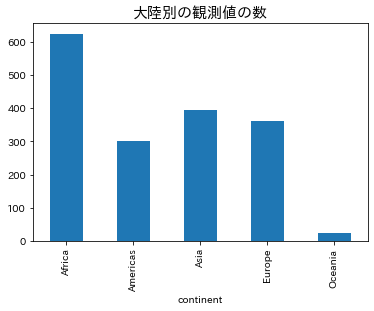

In [15]:
ax = df_group.size().plot(kind='bar')
ax.set_title('大陸別の観測値の数', size=15)
pass

変数別での観測値の数

In [16]:
df_group.count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


#### 平均

それぞれの変数の平均

In [17]:
df_group[three_vars].mean()

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,9.916003e+06,2193.754578
Americas,64.658737,2.450479e+07,7136.110356
Asia,60.064903,7.703872e+07,7902.150428
Europe,71.903686,1.716976e+07,14469.475533
Oceania,74.326208,8.874672e+06,18621.609223


`gdpPercap`と`lifeExp`の大陸別平均の散布図

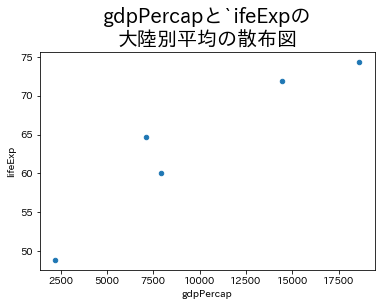

In [18]:
ax = df_group.mean().plot(kind='scatter', x='gdpPercap', y='lifeExp')
ax.set_title('gdpPercapと`ifeExpの\n大陸別平均の散布図', size=20)
pass

#### 標準偏差

それぞれの変数の標準偏差

In [19]:
df_group[three_vars].std()

,lifeExp,pop,gdpPercap
continent,,,
Africa,9.150210,1.549092e+07,2827.929863
Americas,9.345088,5.097943e+07,6396.764112
Asia,11.864532,2.068852e+08,14045.373112
Europe,5.433178,2.051944e+07,9355.213498
Oceania,3.795611,6.506342e+06,6358.983321


#### 最大値

In [20]:
df_group.max()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,Zimbabwe,2007,76.442,135031164,21951.21176
Americas,Venezuela,2007,80.653,301139947,42951.65309
Asia,"Yemen, Rep.",2007,82.603,1318683096,113523.13290
Europe,United Kingdom,2007,81.757,82400996,49357.19017
Oceania,New Zealand,2007,81.235,20434176,34435.36744


#### 最小値

In [21]:
df_group.min()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,Algeria,1952,23.599,60011,241.165876
Americas,Argentina,1952,37.579,662850,1201.637154
Asia,Afghanistan,1952,28.801,120447,331.000000
Europe,Albania,1952,43.585,147962,973.533195
Oceania,Australia,1952,69.120,1994794,10039.595640


#### 3変数の記述統計

In [22]:
df_group[three_vars].describe().applymap("{0:.1f}".format).T

continent             Africa     Americas          Asia      Europe  \
lifeExp   count        624.0        300.0         396.0       360.0   
          mean          48.9         64.7          60.1        71.9   
          std            9.2          9.3          11.9         5.4   
          min           23.6         37.6          28.8        43.6   
          25%           42.4         58.4          51.4        69.6   
          50%           47.8         67.0          61.8        72.2   
          75%           54.4         71.7          69.5        75.5   
          max           76.4         80.7          82.6        81.8   
pop       count        624.0        300.0         396.0       360.0   
          mean     9916003.1   24504795.0    77038722.0  17169764.7   
          std     15490923.3   50979430.2   206885204.6  20519437.6   
          min        60011.0     662850.0      120447.0    147962.0   
          25%      1342075.0    2962358.8     3844393.0   4331500.0   
          50%      4579311.0    6227510.0    14530830.5   8551125.0   
          75%     10801489.8   18340309.0    46300348.0  21802867.0   
          max    135031164.0  301139947.0  1318683096.0  82400996.0   
gdpPercap count        624.0        300.0         396.0       360.0   
          mean        2193.8       7136.1        7902.2     14469.5   
          std         2827.9       6396.8       14045.4      9355.2   
          min          241.2       1201.6         331.0       973.5   
          25%          761.2       3427.8        1057.0      7213.1   
          50%         1192.1       5465.5        2646.8     12081.7   
          75%         2377.4       7830.2        8549.3     20461.4   
          max        21951.2      42951.7      113523.1     49357.2   

continent           Oceania  
lifeExp   count        24.0  
          mean         74.3  
          std           3.8  
          min          69.1  
          25%          71.2  
          50%          73.7  
          75%          77.6  
          max          81.2  
pop       count        24.0  
          mean    8874672.3  
          std     6506342.5  
          min     1994794.0  
          25%     3199212.5  
          50%     6403491.5  
          75%    14351625.0  
          max    20434176.0  
gdpPercap count        24.0  
          mean      18621.6  
          std        6359.0  
          min       10039.6  
          25%       14141.9  
          50%       17983.3  
          75%       22214.1  
          max       34435.4

### groupby.agg()

`agg()`を使うとよりメソッドだけではなく，他の関数も使える。

`()`の中に関数を入れる。

In [23]:
df_group.agg(np.mean)

,year,lifeExp,pop,gdpPercap
continent,,,,
Africa,1979.5,48.865330,9.916003e+06,2193.754578
Americas,1979.5,64.658737,2.450479e+07,7136.110356
Asia,1979.5,60.064903,7.703872e+07,7902.150428
Europe,1979.5,71.903686,1.716976e+07,14469.475533
Oceania,1979.5,74.326208,8.874672e+06,18621.609223


In [24]:
df_group[three_vars].agg([np.max, np.min, np.mean])

lifeExp                            pop                         \
             amax    amin       mean        amax     amin          mean   
continent                                                                 
Africa     76.442  23.599  48.865330   135031164    60011  9.916003e+06   
Americas   80.653  37.579  64.658737   301139947   662850  2.450479e+07   
Asia       82.603  28.801  60.064903  1318683096   120447  7.703872e+07   
Europe     81.757  43.585  71.903686    82400996   147962  1.716976e+07   
Oceania    81.235  69.120  74.326208    20434176  1994794  8.874672e+06   

              gdpPercap                              
                   amax          amin          mean  
continent                                            
Africa      21951.21176    241.165876   2193.754578  
Americas    42951.65309   1201.637154   7136.110356  
Asia       113523.13290    331.000000   7902.150428  
Europe      49357.19017    973.533195  14469.475533  
Oceania     34435.36744  10039.595640  18621.609223

In [25]:
# 自作の関数もOK

func = lambda x: ( np.max(x)-np.min(x) )/np.mean(x)

df_group[['lifeExp','pop','gdpPercap']].agg(func)

,lifeExp,pop,gdpPercap
continent,,,
Africa,1.081401,13.611447,9.896297
Americas,0.666174,12.261971,5.850528
Asia,0.895731,17.115583,14.324219
Europe,0.530877,4.790574,3.343843
Oceania,0.162998,2.077754,1.310079


`continent`の内訳の割合を計算

### 図

**`continent`平均寿命**

In [26]:
df_lifeExp_continent = df_group['lifeExp'].mean()

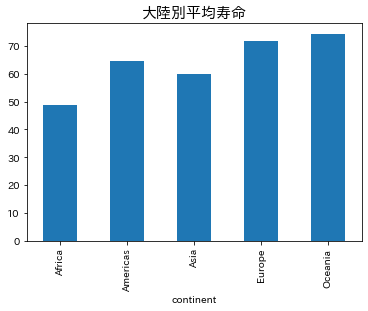

In [27]:
ax = df_lifeExp_continent.plot(kind='bar')
ax.set_title('大陸別平均寿命', size=15)
pass

#### 3つの変数

In [28]:
df_mean = df_group.mean()
df_mean['ln_pop'] = np.log( df_mean['pop'] )
df_mean['ln_gdpPercap'] = df_mean['gdpPercap'].apply(np.log)
df_mean['lifeExp_10'] = df_mean['lifeExp']/10

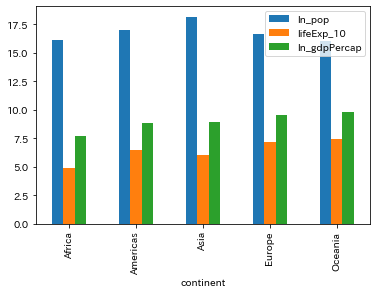

In [29]:
df_mean[['ln_pop','lifeExp_10', 'ln_gdpPercap']].plot(kind='bar')
pass

### 複数階層の`groupby()`

`continent`別の平均時系列を考えるときに有用。

In [30]:
df_group2 = df.groupby(['continent','year'])

In [31]:
df_group2.mean().head()

lifeExp           pop    gdpPercap
continent year                                      
Africa    1952  39.135500  4.570010e+06  1252.572466
          1957  41.266346  5.093033e+06  1385.236062
          1962  43.319442  5.702247e+06  1598.078825
          1967  45.334538  6.447875e+06  2050.363801
          1972  47.450942  7.305376e+06  2339.615674

In [32]:
# lifeExpの列だけを選択した後，unstackを使ってyearが行ラベルになるDataFrameに変換

df_lifeExp_group = df_group2.mean().loc[:,'lifeExp'].unstack(level=0)

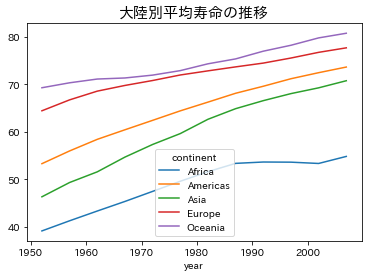

In [33]:
ax = df_lifeExp_group.plot()
ax.set_title('大陸別平均寿命の推移', size=15)
pass

**世界平均との比較**

In [34]:
df_group_year = df.groupby('year')

In [35]:
world_lifeExp = df_group_year.mean()['lifeExp'].to_numpy().reshape(1,12).T

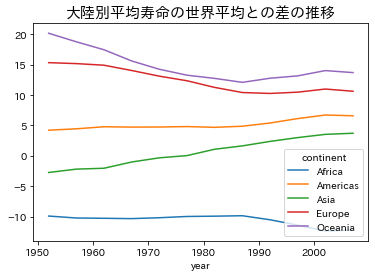

In [36]:
df_lifeExp_diff = df_lifeExp_group - world_lifeExp

ax = df_lifeExp_diff.plot()
ax.set_title('大陸別平均寿命の世界平均との差の推移', size=15)
pass